<a href="https://colab.research.google.com/github/jcarnes01/ece657/blob/main/ECE657_HW1_Carnes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ECE 657 - Probabilistic Machine Learning

Spring 2026 - Prof. Anand N. Vidyashankar

Document name: ECE657_HW1_Carnes

Last modified by: Jordan Carnes

Last modified on: 02/19/2026

Description: Analyzes the UCI bike-share dataset

In [24]:
import subprocess
import sys

# Function - installs python package
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check if ucimlrepo installed
if not 'ucimlrepo' in globals():
  install("ucimlrepo")

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# metadata
print(bike_sharing.metadata)

# variable information
print(bike_sharing.variables)

{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'venue': 'Progress

Data acquisition and basic EDA

Number of records:  17379
Timespan covered:  2011-01-01 to  2012-12-31
0    2011-01-01-0
1    2011-01-01-1
2    2011-01-01-2
3    2011-01-01-3
4    2011-01-01-4
Name: datetime, dtype: object


/tmp/ipython-input-3274987394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['datetime'] = X['dteday'].astype(str) + '-' + X['hr'].astype(str)
/tmp/ipython-input-3274987394.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45, ha='right')


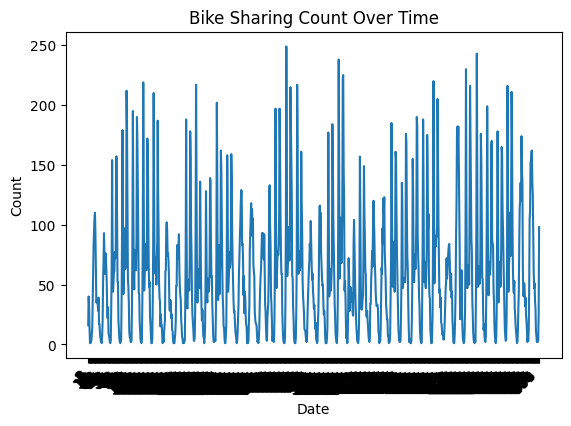

Mean:  189.46
Variance:  32901.46


In [37]:
# Report number of records and timespan covered
print("Number of records: ", len(X))
print("Timespan covered: ",X.dteday.min(), "to ", X.dteday.max())

# Create new column with combined datetime and hour
X['datetime'] = X['dteday'].astype(str) + '-' + X['hr'].astype(str)

# print sample of datetime to confirm concatenation
print(X.datetime.head())

# Plot time series
fig, ax = plt.subplots()
ax.plot(X.datetime[:1000], y.cnt[:1000])

#ax.xaxis.set_major_locator(ticker.MultipleLocator(240))
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Bike Sharing Count Over Time')

# autoformat x-axis labels
fig.autofmt_xdate()

ax.set_xticklabels(ax.get_xticks(), rotation=45, ha='right')
plt.show()

# Calculate mean and Variance
print("Mean: ", round(y.cnt.mean(),2))
print("Variance: ", round(y.cnt.var(),2))


Poisson Likelihood

Gamma Prior and Conjugate Prior
